In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc

/usr/local/anaconda3/lib/python3.5/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [2]:
#Read the preprocessed One hot data
car_feature = pd.read_csv('oneHotPreprocess.csv')
car_label= car_feature['Lable']
car_feature.drop(['Lable'],inplace=True,axis=1)
#change the column name
car_label= pd.DataFrame(car_label)
print(type(car_label))
lableName= ['Lable']
car_label.columns= lableName

#Read the MwMote generated Data
mwmote_carFeature= pd.read_csv('mwmote_oneHotcar_Feature.csv')
mwmote_carLabel= pd.read_csv('mwmoteGeneratedLabel.csv')

#change the lable name
lableName= ['Lable']
mwmote_carLabel.columns= lableName

mwmote_carLabel= mwmote_carLabel.replace(-1,1)


<class 'pandas.core.frame.DataFrame'>


In [3]:
#combinet both the data
columnName= list(car_feature.columns.values)
combine_car_features= pd.DataFrame(columns=columnName)
combine_car_label= pd.DataFrame(columns=lableName)

i= 0
j= 0
k = 0
totalLength= car_feature.shape[0] + mwmote_carFeature.shape[0]

for i in range(totalLength):
    if i<car_feature.shape[0]:
        combine_car_features.loc[j]= car_feature.loc[i]
        combine_car_label.loc[j]= car_label.loc[i]
        j = j + 1
    else:
        combine_car_features.loc[j]= mwmote_carFeature.loc[k]
        combine_car_label.loc[j]= mwmote_carLabel.loc[k]
        j = j + 1
        k = k + 1
        



In [4]:
combine_car_features.head()


,Make_Accura,Make_BMW,Make_Chevrolet,Make_Dodge,Make_Ferrari,Make_Ford,Make_Honda,Make_Jaguar,Make_Lexus,Make_Mazda,...,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability,Age,Deductible,DriverRating,DaysDiff
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.2625,0.000000,0.000000,0.071795
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.4250,1.000000,1.000000,0.069231
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.5875,0.666667,0.666667,0.089744
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.8125,0.333333,0.333333,0.107692
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.3375,0.000000,0.000000,0.094872


In [5]:
combine_car_features.shape

combine_car_label

,Lable
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


In [6]:
#add columns to existing dataframe


combine_car_features['Label']=combine_car_label 



#shuffle the data.
new_combine_features = combine_car_features.set_index(np.random.permutation(combine_car_features.index))

#now divide the feature and label
new_label = new_combine_features['Label']

#drop the Fraud Found lable
#drop the following attributes
new_combine_features.drop(['Label'],inplace=True,axis=1)


In [7]:
#train the model
X_train,X_test,y_train,y_test = train_test_split(new_combine_features,new_label,random_state=3,test_size=0.25)

In [8]:
#for drawing the tree
featureName= list(new_combine_features.columns.values)
lableName= ['Fraudulent','Non-Fraudulent']


In [9]:
#model object along with hyper-parameter of random forest.
'''
model = RandomForestClassifier(n_estimators=20,criterion='gini',max_depth=10,max_features='sqrt',
                               min_samples_split=3,min_weight_fraction_leaf=0.5,max_leaf_nodes=2,
                               min_impurity_decrease=0.3,oob_score=True,n_jobs=1)
'''

model = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=25,max_features='sqrt',
                               oob_score=True,n_jobs=1)

model.fit(X_train,y_train)

print('Random forest classifier:')
predicted = model.predict(X_test)
print(type(predicted),predicted.shape,predicted)
print('Accuracy is ',round(accuracy_score(y_test,model.predict(X_test)) * 100,2))


Random forest classifier:
<class 'numpy.ndarray'> (7479,) [ 1.  1.  1. ...,  1.  1.  1.]
Accuracy is  97.85


In [10]:
# calculating specifity and sensitivity
# 0  := Negative(FraudNotFound)
# 1 := Positive (FraudFound)
cm = confusion_matrix(y_test,predicted)
print("Confusion Matrix:\n",cm)
TN, FP, FN, TP = cm.ravel()
print("TN:",TN)
print("FP:",FP)
print("FN:",FN)
print("TP:",TP)

print("Accuracy:",(TP+TN)/(TP+FP+FN+TN)*100)
print("Sensitivity:",TP/(TP+FN)*100)
print("Specificity:",TN/(TN+FP)*100)

Confusion Matrix:
 [[3473  157]
 [   4 3845]]
TN: 3473
FP: 157
FN: 4
TP: 3845
Accuracy: 97.8473057895
Sensitivity: 99.8960769031
Specificity: 95.6749311295


In [11]:
#cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score


scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

kfold = model_selection.KFold(n_splits=10, random_state=10)
model=RandomForestClassifier(n_estimators=100) 

results = model_selection.cross_validate(estimator=model,X=new_combine_features,y=new_label,cv=kfold,scoring=scoring)

print(np.mean(results['test_accuracy']))
print(np.mean(results['test_precision']))
print(np.mean(results['test_recall']))
print(np.mean(results['test_f1_score']))


0.992580124509
0.905398296905
0.997171006961
0.946599031427


In [12]:
#feature importance
car_feature.head()

,Make_Accura,Make_BMW,Make_Chevrolet,Make_Dodge,Make_Ferrari,Make_Ford,Make_Honda,Make_Jaguar,Make_Lexus,Make_Mazda,...,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability,Age,Deductible,DriverRating,DaysDiff
0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0.2625,0.000000,0.000000,0.071795
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0.4250,1.000000,1.000000,0.069231
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0.5875,0.666667,0.666667,0.089744
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.8125,0.333333,0.333333,0.107692
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0.3375,0.000000,0.000000,0.094872


In [13]:
model = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=25,max_features='sqrt',
                               oob_score=True,n_jobs=1)

model.fit(X_train,y_train)


featureImportance= pd.DataFrame({'Variable':X_train.columns,
              'Importance':model.feature_importances_}).sort_values('Importance', ascending=False)

In [15]:
featureImportance[:20]

,Importance,Variable
27,0.092830,Fault_Policy Holder
84,0.088221,DaysDiff
81,0.085067,Age
80,0.080250,BasePolicy_Liability
28,0.077827,Fault_Third Party
30,0.056838,VehicleCategory_Sport
29,0.029312,VehicleCategory_Sedan
83,0.029224,DriverRating
82,0.028170,Deductible
78,0.023819,BasePolicy_All Perils


In [19]:
featureImportance[75:]

,Importance,Variable
72,0.000164,AddressChange-Claim_under 6 months
1,0.000136,Make_BMW
44,0.000118,Days:Policy-Claim_8 to 15
10,0.000097,Make_Mecedes
7,0.000049,Make_Jaguar
8,0.000034,Make_Lexus
38,0.000033,Days:Policy-Accident_1 to 7
14,0.000026,Make_Porche
4,0.000021,Make_Ferrari
77,0.000000,NumberOfCars_more than 8


In [ ]:
#print the top 10 features
featureImportance.shape
total= featureImportance.Importance.sum()

percentage= (featureImportance.Importance[0]/total)*100
print(total)
print("percentage:",percentage)

In [ ]:
featureImportance[:20].plot('Variable', 'Importance', figsize=(10,6), legend=False);
plt.show()

In [16]:
#function
def plot_fi(fi):
    return fi.plot('Variable','Importance','barh', figsize=(12,7), legend=False)

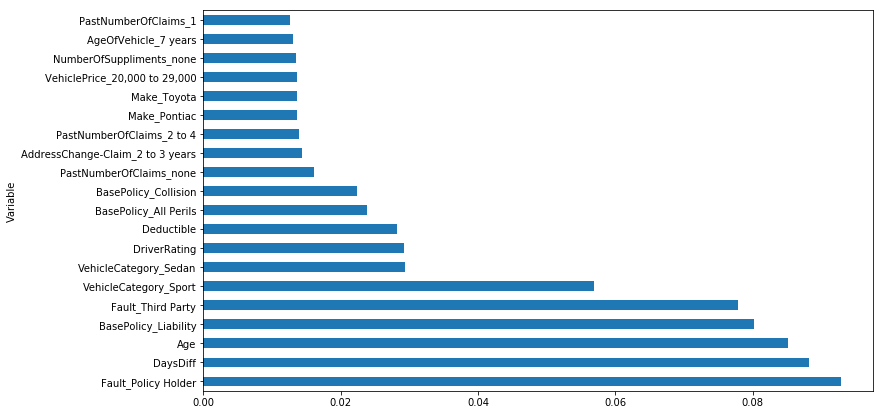

In [17]:
plot_fi(featureImportance[:20]);
plt.show()

In [20]:
to_keep = featureImportance[featureImportance.Importance>0.005]

In [21]:
to_keep.Variable

27                 Fault_Policy Holder
84                            DaysDiff
81                                 Age
80                BasePolicy_Liability
28                   Fault_Third Party
30               VehicleCategory_Sport
29               VehicleCategory_Sedan
83                        DriverRating
82                          Deductible
78               BasePolicy_All Perils
79                BasePolicy_Collision
49             PastNumberOfClaims_none
69    AddressChange-Claim_2 to 3 years
47           PastNumberOfClaims_2 to 4
13                        Make_Pontiac
17                         Make_Toyota
32       VehiclePrice_20,000 to 29,000
67            NumberOfSuppliments_none
55                AgeOfVehicle_7 years
46                PastNumberOfClaims_1
33       VehiclePrice_30,000 to 39,000
71       AddressChange-Claim_no change
56            AgeOfVehicle_more than 7
54                AgeOfVehicle_6 years
6                           Make_Honda
66     NumberOfSuppliment

In [22]:
df_keep = X_train[to_keep.Variable]

In [23]:
df_keep.shape

(22436, 42)

In [ ]:
#train the model

model1 = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=25,max_features='sqrt',
                               oob_score=True,n_jobs=1)

model1.fit(df_keep,y_train)


In [ ]:
X_test= X_test[to_keep.Variable]
X_test.shape

In [ ]:
print('Random forest classifier:')
predicted = model1.predict(X_test)
print(type(predicted),predicted.shape,predicted)
cm = confusion_matrix(y_test,predicted)
print("Confusion Matrix:\n",cm)
TN, FP, FN, TP = cm.ravel()
print("TN:",TN)
print("FP:",FP)
print("FN:",FN)
print("TP:",TP)

print("Accuracy:",(TP+TN)/(TP+FP+FN+TN)*100)
print("Sensitivity:",TP/(TP+FN)*100)
print("Specificity:",TN/(TN+FP)*100)

In [24]:
new_combine_features_Importance= new_combine_features[to_keep.Variable]
new_combine_features_Importance.shape

(29915, 42)

In [26]:
#cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score


scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

kfold = model_selection.KFold(n_splits=10, random_state=10)
model=RandomForestClassifier(n_estimators=100) 

results = model_selection.cross_validate(estimator=model,X=new_combine_features_Importance,y=new_label,cv=kfold,scoring=scoring)

print(np.mean(results['test_accuracy']))
print(np.mean(results['test_precision']))
print(np.mean(results['test_recall']))
print(np.mean(results['test_f1_score']))

0.992479879478
0.903150932588
0.997171006961
0.945201507306


In [ ]:
from scipy.cluster import hierarchy as hc
import scipy

In [ ]:
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=X_train.columns,
    orientation='left', leaf_font_size=16)
plt.show()